# Compressão de imagens por meio do método SVD

In [2]:
from skimage import io
import numpy as np
from matplotlib import pyplot as plt
from skimage.color import rgb2gray

In [3]:
img1 = io.imread("C:\\JupyterLab\\Algebra Linear\\martinez_2.jpg")

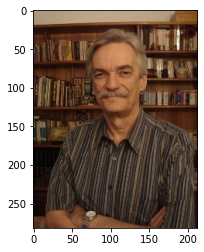

In [9]:
plt.imshow(img1)

In [10]:
img1pb = rgb2gray(img1)

In [27]:
print(img1pb)

[[0.60988078 0.60203765 0.59811608 ... 0.31913137 0.31128824 0.29307922]
 [0.59811608 0.60203765 0.60203765 ... 0.31072275 0.3034451  0.30736667]
 [0.5899902  0.59783333 0.6017549  ... 0.33173725 0.33622431 0.34014588]
 ...
 [0.2389451  0.26639608 0.20730471 ... 0.08311098 0.06236431 0.05675333]
 [0.29720314 0.22325882 0.20338314 ... 0.06742471 0.05844275 0.0489102 ]
 [0.25014431 0.19188627 0.19161843 ... 0.06742471 0.05958157 0.0489102 ]]


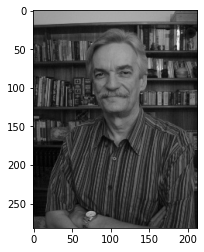

In [26]:
plt.imshow(img1pb, cmap='gray')
plt.savefig('Imagem martinez preto e branco.png', bbox_inches='tight', dpi=300)

In [19]:
u, s, vh = np.linalg.svd(img1pb, full_matrices=False)
smat = np.diag(s)
print(u.shape, smat.shape, vh.shape)

(282, 213) (213, 213) (213, 213)


In [20]:
smat

array([[7.02354072e+01, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 1.16377552e+01, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 1.12403325e+01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        4.66806543e-02, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 4.55409201e-02, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 4.04053914e-02]])

In [21]:
def compressao(a, sv):
    u, s, vh = np.linalg.svd(a, full_matrices=False)
    smat = np.diag(s)
    
    u_comp = np.zeros((u.shape[0], sv))
    smat_comp = np.zeros((sv, sv))
    vh_comp = np.zeros((sv, vh.shape[1]))
    
    for i in range(len(u_comp)):
    
        for j in range(len(u_comp[i])):
        
            u_comp[i][j] = u[i][j]
            
    for i in range(len(smat_comp)):
    
        for j in range(len(smat_comp[i])):
        
            smat_comp[i][j] = smat[i][j]
            
    for i in range(len(vh_comp)):
    
        for j in range(len(vh_comp[i])):
        
            vh_comp[i][j] = vh[i][j]
            
    #print(u_comp.shape, smat_comp.shape, vh_comp.shape)
            
    a_comp = np.dot(u_comp, np.dot(smat_comp, vh_comp))
        
    return a_comp

In [22]:
dic_images = {}

for sv in [200, 150, 100, 50, 25, 10, 5, 1]:
    img1pb_comp = compressao(img1pb, sv)
    #plt.imshow(img1pb_comp, cmap='gray')
    
    nome_arquivo = "Imagem Martinez Compactada a partir de " + str(sv) + " valores singulares"
    print(nome_arquivo)
    dic_images[nome_arquivo] = img1pb_comp
    #plt.savefig(nome_arquivo, bbox_inches='tight', dpi=150)

Imagem Martinez Compactada a partir de 200 valores singulares
Imagem Martinez Compactada a partir de 150 valores singulares
Imagem Martinez Compactada a partir de 100 valores singulares
Imagem Martinez Compactada a partir de 50 valores singulares
Imagem Martinez Compactada a partir de 25 valores singulares
Imagem Martinez Compactada a partir de 10 valores singulares
Imagem Martinez Compactada a partir de 5 valores singulares
Imagem Martinez Compactada a partir de 1 valores singulares


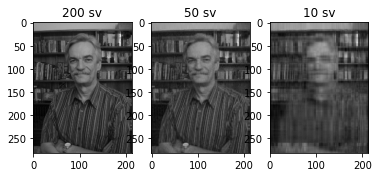

In [23]:
fig = plt.figure()
ax = fig.add_subplot(1, 3, 1)
imgplot = plt.imshow(dic_images["Imagem Martinez Compactada a partir de 200 valores singulares"], cmap='gray')
ax.set_title("200 sv")

ax = fig.add_subplot(1, 3, 2)
imgplot = plt.imshow(dic_images["Imagem Martinez Compactada a partir de 50 valores singulares"], cmap='gray')
ax.set_title("50 sv")

ax = fig.add_subplot(1, 3, 3)
imgplot = plt.imshow(dic_images["Imagem Martinez Compactada a partir de 10 valores singulares"], cmap='gray')
ax.set_title("10 sv")

fig.savefig('Compressão com diferentes quantidades de valores singulares.png', bbox_inches='tight', dpi=300)

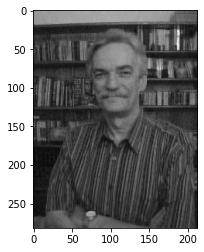

In [29]:
plt.imshow(dic_images["Imagem Martinez Compactada a partir de 50 valores singulares"], cmap='gray')
plt.savefig('Imagem Martinez Compactada a partir de 50 valores singulares.png', bbox_inches='tight', dpi=300)